In [ ]:
#Intro to Computer Vision and Convolutional Neural Networks(CNN)

In [ ]:
#Loading the Data

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install tensorflow-datasets

     |████████████████████████████████| 4.0 MB 497 kB/s eta 0:00:01
     |████████████████████████████████| 86 kB 618 kB/s eta 0:00:01
     |████████████████████████████████| 48 kB 638 kB/s eta 0:00:01
     |████████████████████████████████| 207 kB 2.3 MB/s eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=338887b58314aa6a22e24c6d832a5e299d8cf781b331cd2f3e061043db5210fa
  Stored in directory: /home/thembajsph/.cache/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise
You should consider upgrading via the '/home/thembajsph/Downloads/anaconda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Print the version of tf, and tfds

print("TensorFlow's version used in notebook:{}".format(tf.__version__))
print("TensorFlow datasets's version used in notebook:{}".format(tfds.__version__))

TensorFlow's version used in notebook:2.4.1
TensorFlow datasets's version used in notebook:4.4.0


In [3]:
(train_data, val_data, test_data), info = tfds.load('cifar10', 
                                          split=['train', 'test[:50%]','test[50%:]'],
                                          as_supervised=True, 
                                          shuffle_files=False,
                                          with_info=True
)

In [4]:
print("The number images in training set: {}".format(len(train_data)))
print("The number images in validation set: {}".format(len(val_data)))
print("The number images in test set: {}".format(len(test_data)))

The number images in training set: 50000
The number images in validation set: 5000
The number images in test set: 5000


In [5]:
# Getting the number of examples 

info.splits['train'].num_examples

50000

In [6]:
# Getting the number of examples 

info.splits['test'].num_examples

10000

In [7]:
# getting class names

info.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
# Number of classes

info.features['label'].num_classes

10

In [9]:
 #Looking in Images

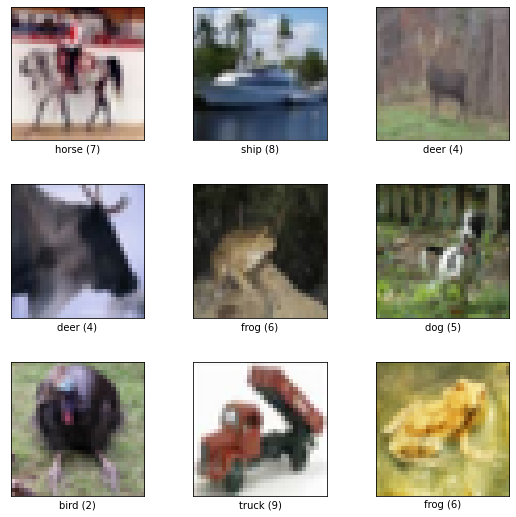

In [10]:
fig = tfds.show_examples(train_data, info)

In [11]:
#Preparing Data: Building a Training Pipeline

In [11]:
def preprocess(image, label):

  """ 
  Take image and label, 
  convert images to float32, and return converted image &label
  """

  normalized_img = tf.cast(image, tf.float32)/255.0

  return normalized_img, label


In [12]:
def train_data_prep(data, shuffle_size, batch_size):

  data = data.map(preprocess)
  data = data.cache()
  data = data.shuffle(shuffle_size).repeat()
  data = data.batch(batch_size)
  data = data.prefetch(1)

  return data

In [13]:
def test_data_prep(data, batch_size):

  data = data.map(preprocess)
  data = data.batch(batch_size)
  data = data.cache()
  data = data.prefetch(1)

  return data

In [14]:
train_data_prepared = train_data_prep(train_data, 1000, 32)

In [15]:
test_data_prepared = test_data_prep(test_data, 32)

In [16]:
val_data_prepared = test_data_prep(val_data, 32)

In [18]:
#Creating, Compiling and Training a Model

In [17]:
input_shape = [32,32,3]


cifar_cnn = tf.keras.models.Sequential([
    # First Convolutional layer: 64 filters, kernel/filter size of 3

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  
    # First Pooling layer
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Second Convolutional layer & Pooling

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Third Convolutional & Pooling layer

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Flattening layer: For converting previous output into 1D column vector

    tf.keras.layers.Flatten(),

    # Fully Connected layers

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),

    # Last layer: 10 neurons for 10 classes, activated by softmax
    tf.keras.layers.Dense(units=10, activation='softmax')

])

In [18]:
# Model summary

cifar_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

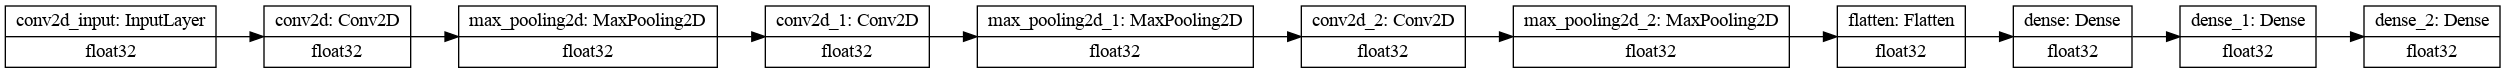

In [19]:
tf.keras.utils.plot_model(cifar_cnn, rankdir='LR',show_dtype=True)

In [20]:
cifar_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [26]:
pip install pydot

You should consider upgrading via the '/home/thembajsph/Downloads/anaconda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
batch_size = 32
train_size = info.splits["train"].num_examples

val_size = len(val_data_prepared)


train_steps = int(train_size/batch_size)
val_steps = int(val_size/batch_size)

model_history = cifar_cnn.fit(train_data_prepared, 
              validation_data=val_data_prepared,
              epochs=9,
              steps_per_epoch=train_steps,
              validation_steps=val_steps)

Epoch 1/9
1562/1562 [==============================] - 498s 318ms/step - loss: 1.8278 - accuracy: 0.3120 - val_loss: 1.2815 - val_accuracy: 0.5625
Epoch 2/9
1562/1562 [==============================] - 257s 165ms/step - loss: 1.1983 - accuracy: 0.5737 - val_loss: 1.0438 - val_accuracy: 0.6719
Epoch 3/9
1562/1562 [==============================] - 138s 89ms/step - loss: 0.9847 - accuracy: 0.6547 - val_loss: 0.8843 - val_accuracy: 0.6953
Epoch 4/9
1562/1562 [==============================] - 137s 87ms/step - loss: 0.8390 - accuracy: 0.7084 - val_loss: 0.9770 - val_accuracy: 0.6797
Epoch 5/9
1562/1562 [==============================] - 139s 89ms/step - loss: 0.7399 - accuracy: 0.7417 - val_loss: 0.8645 - val_accuracy: 0.7266
Epoch 6/9
1562/1562 [==============================] - 136s 87ms/step - loss: 0.6695 - accuracy: 0.7674 - val_loss: 0.9680 - val_accuracy: 0.6562
Epoch 7/9
1562/1562 [==============================] - 135s 86ms/step - loss: 0.5887 - accuracy: 0.7953 - val_loss: 0.9472

In [ ]:
#Visualizing the Model Results

<AxesSubplot:>

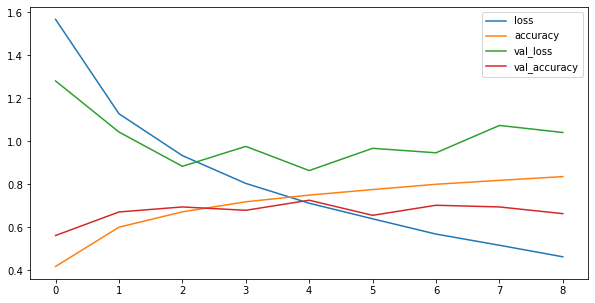

In [22]:
import pandas as pd
 
 # Getting the model training history
model_history = model_history.history

# Model history into a pandas dataframe
loss_acc_df = pd.DataFrame(model_history)

# Plotting the loss and accuracy 

loss_acc_df.plot(figsize=(10,5))

In [23]:
acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = cifar_cnn.history.epoch

# function to plot accuracy 

def plot_acc(acc, val_acc, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

def plot_loss(loss, val_loss, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.legend(loc=0)
  plt.figure()

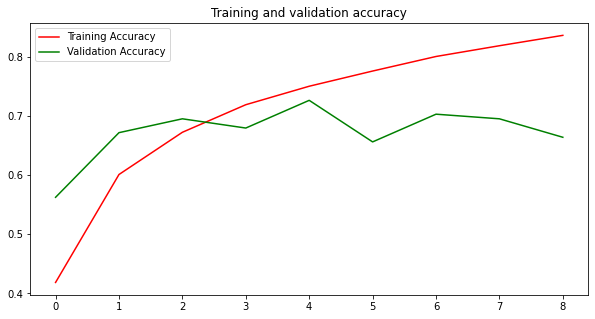

<Figure size 432x288 with 0 Axes>

In [24]:
#Plotting acc

plot_acc(acc, val_acc, epochs)

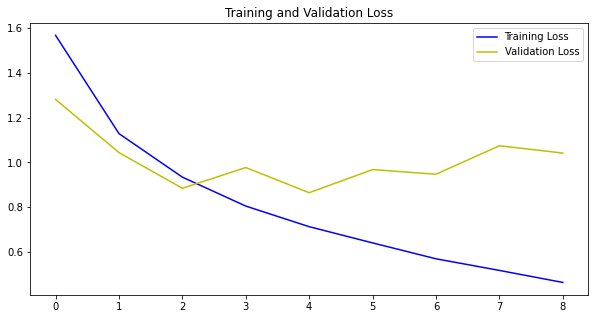

<Figure size 432x288 with 0 Axes>

In [25]:
plot_loss(loss, val_loss, epochs)

In [ ]:
 #Improving the Model

In [26]:
# reloading the data

# Training set = 80% of orginal training set (50,000 images)
# Validation set = 20% of training set = 10,000 images
# Test set = full orginal test set = 10,000 images

(train_data, val_data, test_data), info = tfds.load('cifar10', 
                                          split=['train[:80%]', 'train[80%:]','test'],
                                          as_supervised=True, 
                                          shuffle_files=True,
                                          with_info=True
)

In [27]:
train_final = train_data_prep(train_data, 1000, 32)

val_final = test_data_prep(val_data, 32)
test_final = test_data_prep(test_data, 32)

In [28]:
input_shape = [32,32,3]

cifar_cnn_2 = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=10, activation='softmax')

])

# Nadam optimizer is a version of adam

cifar_cnn_2.compile(loss='sparse_categorical_crossentropy',
                    optimizer='nadam',
                    metrics='accuracy')

In [ ]:
# Training the model for 10 epochs

batch_size = 32
train_size = 40000
val_size = 10000


train_steps = int(train_size/batch_size)
val_steps = int(val_size/batch_size)

model_history_2 = cifar_cnn_2.fit(train_final, 
              validation_data=val_final,
              epochs=10,
              steps_per_epoch=train_steps,
              validation_steps=val_steps)

Epoch 1/10
1207/1250 [===========================>..] - ETA: 1:07 - loss: 1.8812 - accuracy: 0.3018